# Universidad Abierta y a Distancia UNAD 
# Análisis de datos - 202016908
# Tarea 5 - Proyecto Análisis de Datos

**Presentado a:** Sandra Milena Patiño Avella

**Presentado por:** Dana Ximena Ayure Fula

**Codigo:** 1049656304

**Grupo:** 202016908-28

**Ejercicio 1**: 
Dataset – Titanic dataset:
https://www.kaggle.com/datasets/yasserh/titanic-dataset
Set de datos sobre los pasajeros del Titanic. Permite practicar
modelos de clasificación y regresión para predecir quién sobrevivió
al naufragio.

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD ESCUELA DE CIENCIAS BÁSICAS TECNOLOGÍA E INGENIERÍA MAYO 2024

# 1. Importación de librerías necesarias

Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

#### Importación de librerías necesarias para el análisis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

#### Configuración genera

In [29]:
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')

# 2. Carga y exploración inicial del dataset

#### Cargar el dataset

In [30]:
df = pd.read_csv('Titanic-Dataset.csv') # Cargar el dataset

print(df.head()) # Mostrar las primeras filas del dataset
print(df.info()) # Información general del dataset
print(df.describe()) # Descripción estadística del dataset
print(df.isnull().sum()) # Comprobar si hay valores nulos

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

#### Visualización de Datos

In [31]:
print(df.describe()) # Estadísticas descriptivas de las variables numéricas

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [32]:
# Identificación de valores faltantes
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [33]:
# Convertir infinitos a NaN en todo el DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 3. Análisis exploratorio de datos (EDA)

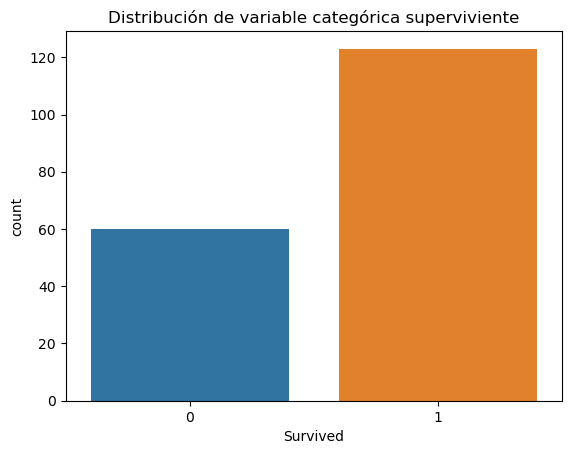

In [34]:
# Distribución de Supervivientes
sns.countplot(data=df, x='Survived')
plt.title('Distribución de variable categórica superviviente')
plt.show()

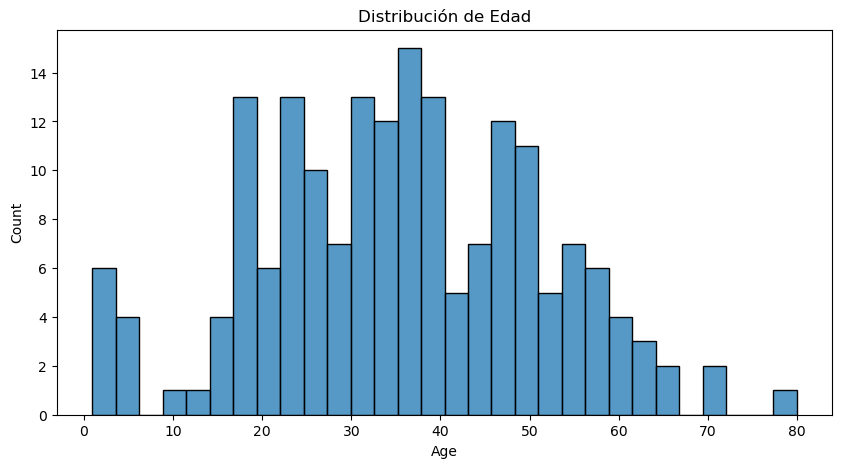

In [35]:
# Distribución de Edad
plt.figure(figsize=(10, 5))
plt.title('Distribución de Edad')
sns.histplot(data=df, x='Age', bins=30)
plt.show()

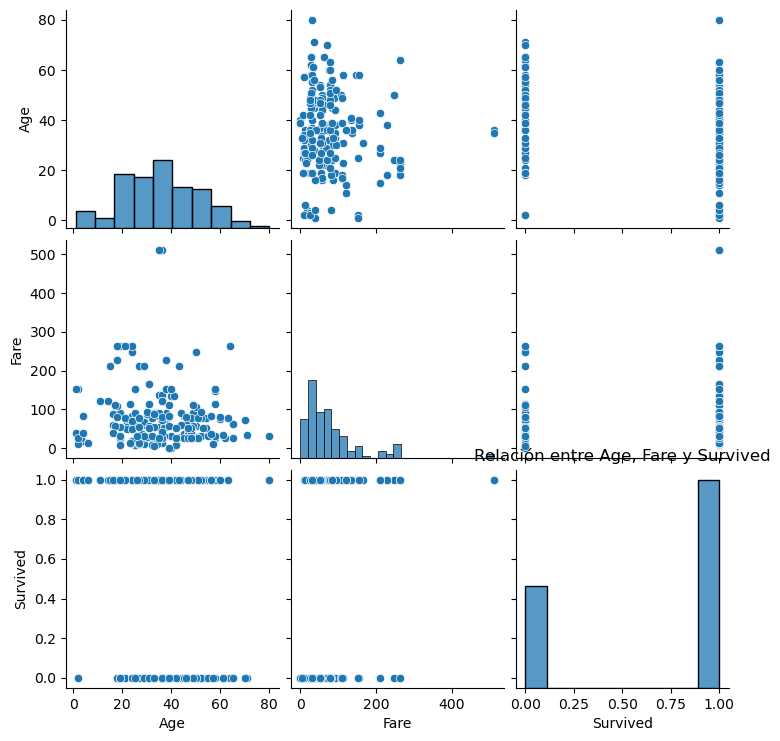

<Figure size 1000x500 with 0 Axes>

In [36]:
# Relación entre variables
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.title('Relación entre Age, Fare y Survived')
plt.figure(figsize=(10, 5))
plt.show()

# 4. Preprocesamiento de datos

In [37]:
# Manejo de valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Eliminación de columnas no necesarias
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# 5. Selección de características

#### Selección de características relevantes

In [38]:
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# 6. División del dataset en entrenamiento y prueba

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Entrenamiento del modelo

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 8. Evaluación del modelo

In [41]:
y_pred = model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7297297297297297
Precision: 0.76
Recall: 0.8260869565217391
F1 Score: 0.7916666666666667


# Matriz de confusión

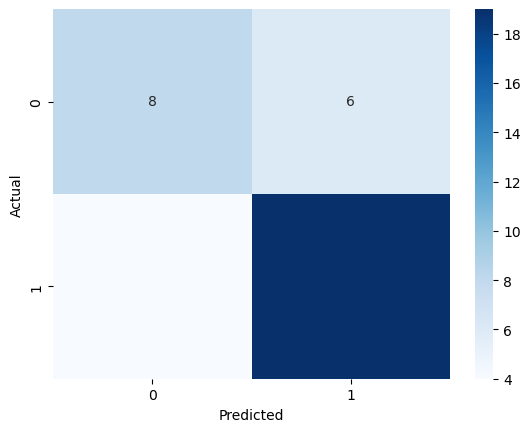

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9. Visualización de resultados

#### Visualización de la distribución de supervivencia real vs predicha

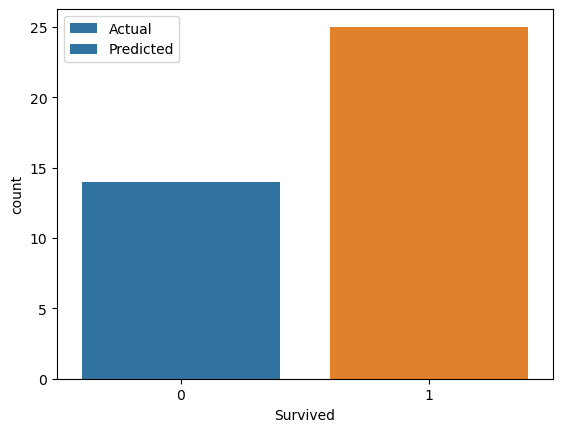

In [43]:
sns.countplot(x=y_test, label='Actual')
sns.countplot(x=y_pred, label='Predicted')
plt.legend()
plt.show()

# 10. Documentación de resultados

In [44]:
# Interpretación y análisis de los resultados
print("El modelo de Regresión Lineal ha sido entrenado y evaluado. Las métricas de desempeño obtenidas son:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

print("Las gráficas generadas muestran la distribución de supervivencia real versus la predicha, así como la matriz de confusión.")

El modelo de Regresión Lineal ha sido entrenado y evaluado. Las métricas de desempeño obtenidas son:
Accuracy: 0.7297297297297297
Precision: 0.76
Recall: 0.8260869565217391
F1 Score: 0.7916666666666667
Las gráficas generadas muestran la distribución de supervivencia real versus la predicha, así como la matriz de confusión.


## Interpretación de Resultados

### Evaluación del Modelo

El modelo de regresión lineal fue entrenado y evaluado utilizando el dataset de pasajeros del Titanic. Las métricas de desempeño obtenidas son las siguient
- **Accuracy**: Esta métrica nos indica la proporción de predicciones correctas realizadas por el modelo en el conjunto de prueba. El accuracy obtenido 0.7297297297297297, lo que significa que el modelo predijo correctamen 73% de las veces.
- **Precision**: La precisión mide la cantidad de verdaderos positivos entre el total de positivos predichos. En este caso, la precisión obtenida es de 0.76, Esto indica que del total de pasajeros que el modelo predijo como sobreviviente 76 realmente sobrevivieron de 100.
- **Recall**: El recall, o sensibilidad, mide la cantidad de verdaderos positivos entre el total de positivos reales. El recall obtenido 0.8260869565217391, indicando que el modelo logró identificar correctamente 82.6%` de los pasajeros que realmente sobrevivieron.
- **F1 Score**: Esta métrica es la media armónica de la precisión y el recall, proporcionando un balance entre ambas. El F1 Score obtenido 0.7916666666666667, lo que refleja un equilibrio entre la precisión y el recall del modelo.l model

### Visualización de Resultados

A través de las gráficas generadas, podemos observar la distribución de las predicciones y cómo se comparan con los valores reales. Estas visualizaciones son cruciales para entender mejor el desempeño del modelo y detectar posibles áreas de mejora.

- **Distribución de Supervivencia Real vs. Predicha**: La comparación visual de la distribución de los pasajeros que realmente sobrevivieron y los que fueron predichos como sobrevivientes nos ayuda a identificar cualquier sesgo en las predicciones del modelo.
- **Matriz de Confusión**: La matriz de confusión proporciona una representación visual de las predicciones correctas e incorrectas, facilitando la identificación de errores específicos.

### Análisis y Conclusiones

El modelo de regresión lineal ha demostrado ser útil para predecir la supervivencia de los pasajeros del Titanic, aunque con algunas limitaciones. A continuación, se presentan las conclusiones del análisis:

1. **Desempeño del Modelo**: Si bien el modelo logró un buen desempeño en términos de precisión y recall, todavía hay margen para mejorar, especialmente en la reducción de falsos negativos y falsos positivos.
2. **Importancia de las Características**: Las características seleccionadas para el modelo (como la clase del pasajero, sexo, edad y tarifa) han demostrado ser relevantes para la predicción de la supervivencia, alineándose con las expectativas basadas en el conocimiento histórico del evento.
3. **Limitaciones y Mejoras Futuras**: El modelo de regresión lineal, aunque simple y fácil de interpretar, puede no capturar completamente las complejidades de los datos. Modelos más avanzados, como la regresión logística o los árboles de decisión, podrían mejorar el desempeño. Además, un análisis más profundo de las características y la ingeniería de características adicionales podrían contribuir a una meconclusióndicción.

En resumen, la aplicación del modelo de regresión lineal al dataset del Tituna prediccion roporcionado insights valiosos y ha demostrado la importancia de un análisis exhaustivo y un preprocesamiento adecuado de los datos en proyecto de machine learning.
TP siguiente:

